In [ ]:
!pip install dgl
!pip install torch_geometric
#!pip install pandas google-auth google-auth-oauthlib google-auth-httplib2 google-api-python-client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import plotly.graph_objects as go

In [ ]:
df_10 = pd.read_csv("parsed_GMn_dataset.txt", sep=" ", header=None)
#df_11 = pd.read_csv("parsed_GEn_dataset.txt", sep=" ", header=None)

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
column_names=["nevent","Number of Tracks Found","Number of good hits on all tracks","Hits on track 1","Hits on track 2","Hits on track 3","Track index","GEM Layer","Global X","Global Y",
              "Global X_Layer0","Global Y_Layer0","Layer0_On Track?",
              "Global X_Layer1","Global Y_Layer1","Layer1_On Track?",
              "Global X_Layer2","Global Y_Layer2","Layer2_On Track?",
              "Global X_Layer3","Global Y_Layer3","Layer3_On Track?",
              "Global X_Layer4","Global Y_Layer4","Layer4_On Track?"]

df_10.columns = column_names
#df_11.columns = column_names

In [ ]:
dataframes = [df_10]#, df_11]

adjustment = 0
result_dfs = []

for df_temp in dataframes:
    df_copy = df_temp.copy()
    df_copy['nevent'] += adjustment
    result_dfs.append(df_copy)

    adjustment = df_copy['nevent'].iloc[-1] + 1

df = pd.concat(result_dfs, axis=0, ignore_index=True)

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df_filtered = df

In [ ]:
filtered_df = df

In [ ]:
filtered_df = filtered_df.groupby('nevent').filter(lambda x: not ((x['Global X_Layer1-1'] != 0) & (x['Global X_Layer1-2'] != 0)).any())
filtered_df = filtered_df.groupby('nevent').filter(lambda x: not ((x['Global X_Layer1-1'] != 0) & (x['Global X_Layer1-3'] != 0)).any())
filtered_df = filtered_df.groupby('nevent').filter(lambda x: not ((x['Global X_Layer1-2'] != 0) & (x['Global X_Layer1-3'] != 0)).any())

filtered_df = filtered_df.groupby('nevent').filter(lambda x: not ((x['Global X_Layer3-1'] != 0) & (x['Global X_Layer3-2'] != 0)).any())
filtered_df = filtered_df.groupby('nevent').filter(lambda x: not ((x['Global X_Layer3-1'] != 0) & (x['Global X_Layer3-3'] != 0)).any())
filtered_df = filtered_df.groupby('nevent').filter(lambda x: not ((x['Global X_Layer3-2'] != 0) & (x['Global X_Layer3-3'] != 0)).any())

filtered_df = filtered_df.groupby('nevent').filter(lambda x: not ((x['Global X_Layer4-1'] != 0) & (x['Global X_Layer4-2'] != 0)).any())
filtered_df = filtered_df.groupby('nevent').filter(lambda x: not ((x['Global X_Layer4-1'] != 0) & (x['Global X_Layer4-3'] != 0)).any())
filtered_df = filtered_df.groupby('nevent').filter(lambda x: not ((x['Global X_Layer4-1'] != 0) & (x['Global X_Layer4-4'] != 0)).any())
filtered_df = filtered_df.groupby('nevent').filter(lambda x: not ((x['Global X_Layer4-2'] != 0) & (x['Global X_Layer4-3'] != 0)).any())
filtered_df = filtered_df.groupby('nevent').filter(lambda x: not ((x['Global X_Layer4-2'] != 0) & (x['Global X_Layer4-4'] != 0)).any())
filtered_df = filtered_df.groupby('nevent').filter(lambda x: not ((x['Global X_Layer4-3'] != 0) & (x['Global X_Layer4-4'] != 0)).any())

KeyError: ignored

In [ ]:
df = filtered_df

In [ ]:
df.loc[df['Global X_Layer1-1'] == 0, 'Global X_Layer1-1'] = df.loc[df['Global X_Layer1-1'] == 0, 'Global X_Layer1-2']
df.loc[df['Global Y_Layer1-1'] == 0, 'Global Y_Layer1-1'] = df.loc[df['Global Y_Layer1-1'] == 0, 'Global Y_Layer1-2']
df.loc[df['Layer1-1_On Track?'] == 0, 'Layer1-1_On Track?'] = df.loc[df['Layer1-1_On Track?'] == 0, 'Layer1-2_On Track?']

df.loc[df['Global X_Layer1-1'] == 0, 'Global X_Layer1-1'] = df.loc[df['Global X_Layer1-1'] == 0, 'Global X_Layer1-3']
df.loc[df['Global Y_Layer1-1'] == 0, 'Global Y_Layer1-1'] = df.loc[df['Global Y_Layer1-1'] == 0, 'Global Y_Layer1-3']
df.loc[df['Layer1-1_On Track?'] == 0, 'Layer1-1_On Track?'] = df.loc[df['Layer1-1_On Track?'] == 0, 'Layer1-3_On Track?']

In [ ]:
df.loc[df['Global X_Layer3-1'] == 0, 'Global X_Layer3-1'] = df.loc[df['Global X_Layer3-1'] == 0, 'Global X_Layer3-2']
df.loc[df['Global Y_Layer3-1'] == 0, 'Global Y_Layer3-1'] = df.loc[df['Global Y_Layer3-1'] == 0, 'Global Y_Layer3-2']
df.loc[df['Layer3-1_On Track?'] == 0, 'Layer3-1_On Track?'] = df.loc[df['Layer3-1_On Track?'] == 0, 'Layer3-2_On Track?']

df.loc[df['Global X_Layer3-1'] == 0, 'Global X_Layer3-1'] = df.loc[df['Global X_Layer3-1'] == 0, 'Global X_Layer3-3']
df.loc[df['Global Y_Layer3-1'] == 0, 'Global Y_Layer3-1'] = df.loc[df['Global Y_Layer3-1'] == 0, 'Global Y_Layer3-3']
df.loc[df['Layer3-1_On Track?'] == 0, 'Layer3-1_On Track?'] = df.loc[df['Layer3-1_On Track?'] == 0, 'Layer3-3_On Track?']

In [ ]:
df.loc[df['Global X_Layer4-1'] == 0, 'Global X_Layer4-1'] = df.loc[df['Global X_Layer4-1'] == 0, 'Global X_Layer4-2']
df.loc[df['Global Y_Layer4-1'] == 0, 'Global Y_Layer4-1'] = df.loc[df['Global Y_Layer4-1'] == 0, 'Global Y_Layer4-2']
df.loc[df['Layer4-1_On Track?'] == 0, 'Layer4-1_On Track?'] = df.loc[df['Layer4-1_On Track?'] == 0, 'Layer4-2_On Track?']

df.loc[df['Global X_Layer4-1'] == 0, 'Global X_Layer4-1'] = df.loc[df['Global X_Layer4-1'] == 0, 'Global X_Layer4-3']
df.loc[df['Global Y_Layer4-1'] == 0, 'Global Y_Layer4-1'] = df.loc[df['Global Y_Layer4-1'] == 0, 'Global Y_Layer4-3']
df.loc[df['Layer4-1_On Track?'] == 0, 'Layer4-1_On Track?'] = df.loc[df['Layer4-1_On Track?'] == 0, 'Layer4-3_On Track?']

df.loc[df['Global X_Layer4-1'] == 0, 'Global X_Layer4-1'] = df.loc[df['Global X_Layer4-1'] == 0, 'Global X_Layer4-4']
df.loc[df['Global Y_Layer4-1'] == 0, 'Global Y_Layer4-1'] = df.loc[df['Global Y_Layer4-1'] == 0, 'Global Y_Layer4-4']
df.loc[df['Layer4-1_On Track?'] == 0, 'Layer4-1_On Track?'] = df.loc[df['Layer4-1_On Track?'] == 0, 'Layer4-4_On Track?']

In [ ]:
df.rename(columns={'Global X_Layer1-1': 'Global X_Layer1'}, inplace=True)
df.rename(columns={'Global Y_Layer1-1': 'Global Y_Layer1'}, inplace=True)
df.rename(columns={'Layer1-1_On Track?': 'Layer1_On Track?'}, inplace=True)

df.rename(columns={'Global X_Layer3-1': 'Global X_Layer3'}, inplace=True)
df.rename(columns={'Global Y_Layer3-1': 'Global Y_Layer3'}, inplace=True)
df.rename(columns={'Layer3-1_On Track?': 'Layer3_On Track?'}, inplace=True)

df.rename(columns={'Global X_Layer4-1': 'Global X_Layer4'}, inplace=True)
df.rename(columns={'Global Y_Layer4-1': 'Global Y_Layer4'}, inplace=True)
df.rename(columns={'Layer4-1_On Track?': 'Layer4_On Track?'}, inplace=True)

In [ ]:
df.drop(columns=['Global X_Layer1-2', 'Global X_Layer1-3'], inplace=True)
df.drop(columns=['Global Y_Layer1-2', 'Global Y_Layer1-3'], inplace=True)
df.drop(columns=['Layer1-2_On Track?', 'Layer1-3_On Track?'], inplace=True)

df.drop(columns=['Global X_Layer3-2', 'Global X_Layer3-3'], inplace=True)
df.drop(columns=['Global Y_Layer3-2', 'Global Y_Layer3-3'], inplace=True)
df.drop(columns=['Layer3-2_On Track?', 'Layer3-3_On Track?'], inplace=True)

df.drop(columns=['Global X_Layer4-2', 'Global X_Layer4-3', 'Global X_Layer4-4'], inplace=True)
df.drop(columns=['Global Y_Layer4-2', 'Global Y_Layer4-3', 'Global Y_Layer4-4'], inplace=True)
df.drop(columns=['Layer4-2_On Track?', 'Layer4-3_On Track?', 'Layer4-4_On Track?'], inplace=True)

In [ ]:
df_filtered = df[(df['Global X_Layer0'] != 0) | (df['Global X_Layer1'] != 0) | (df['Global X_Layer2'] != 0) | (df['Global X_Layer3'] != 0) | (df['Global X_Layer4'] != 0)]
df_filtered = df_filtered[(df_filtered['Number of Tracks Found'] ==1)]

#df_filtered = df_filtered_2.copy()
df_filtered.reset_index(drop=True, inplace=True)

In [ ]:
len(df_filtered)

3542093

In [ ]:
import numpy as np
import torch
import torch_geometric
from torch_geometric.data import Data
from scipy.spatial.distance import cdist

data_list = []

nevent = []
dataset = []
y = []
edges = []
dataset_2D = []
hit_layer = []
dist_test = []

for event in range(df_filtered['nevent'].nunique()):
    if (df_filtered['nevent'].isin([event]).any()):
        df_portion = df_filtered[df_filtered['nevent']==event]

        layer = []
        layer_X = []
        layer_Y = []
        layer_Z = []
        target = []
        coordinates = [[], [], []]
        edge_index = []
        coordinates_2D = [[], []]

        #if 0 in df_portion['GEM Layer'].values:
        nevent += [event] * ((df_portion['Global X_Layer0'] != 0).sum())
        layer_X.extend(df_portion.iloc[0:(df_portion['Global X_Layer0'] != 0).sum()]['Global X_Layer0'].values.tolist())
        layer_Y.extend(df_portion.iloc[0:(df_portion['Global X_Layer0'] != 0).sum()]['Global Y_Layer0'].values.tolist())
        layer_Z += [1] * ((df_portion['Global X_Layer0'] != 0).sum())
        layer += [0] * ((df_portion['Global X_Layer0'] != 0).sum())
        target.extend(df_portion.iloc[0:(df_portion['Global X_Layer0'] != 0).sum()]["Layer0_On Track?"].values.tolist())

#if 1 in df_portion['GEM Layer'].values:
        nevent += [event] * ((df_portion['Global X_Layer1'] != 0).sum())
        layer_X.extend(df_portion.iloc[0:(df_portion['Global X_Layer1'] != 0).sum()]['Global X_Layer1'].values.tolist())
        layer_Y.extend(df_portion.iloc[0:(df_portion['Global X_Layer1'] != 0).sum()]['Global Y_Layer1'].values.tolist())
        layer_Z += [2] * ((df_portion['Global X_Layer1'] != 0).sum())
        layer += [1] * ((df_portion['Global X_Layer1'] != 0).sum())
        target.extend(df_portion.iloc[0:(df_portion['Global X_Layer1'] != 0).sum()]["Layer1_On Track?"].values.tolist())


#if 2 in df_portion['GEM Layer'].values:
        nevent += [event] * ((df_portion['Global X_Layer2'] != 0).sum())
        layer_X.extend(df_portion.iloc[0:(df_portion['Global X_Layer2'] != 0).sum()]['Global X_Layer2'].values.tolist())
        layer_Y.extend(df_portion.iloc[0:(df_portion['Global X_Layer2'] != 0).sum()]['Global Y_Layer2'].values.tolist())
        layer_Z += [3] * ((df_portion['Global X_Layer2'] != 0).sum())
        layer += [2] * ((df_portion['Global X_Layer2'] != 0).sum())
        target.extend(df_portion.iloc[0:(df_portion['Global X_Layer2'] != 0).sum()]["Layer2_On Track?"].values.tolist())


#if 3 in df_portion['GEM Layer'].values:
        nevent += [event] * ((df_portion['Global X_Layer3'] != 0).sum())
        layer_X.extend(df_portion.iloc[0:(df_portion['Global X_Layer3'] != 0).sum()]['Global X_Layer3'].values.tolist())
        layer_Y.extend(df_portion.iloc[0:(df_portion['Global X_Layer3'] != 0).sum()]['Global Y_Layer3'].values.tolist())
        layer_Z += [4] * ((df_portion['Global X_Layer3'] != 0).sum())
        layer += [3] * ((df_portion['Global X_Layer3'] != 0).sum())
        target.extend(df_portion.iloc[0:(df_portion['Global X_Layer3'] != 0).sum()]["Layer3_On Track?"].values.tolist())


#if 4 in df_portion['GEM Layer'].values:
        nevent += [event] * ((df_portion['Global X_Layer4'] != 0).sum())
        layer_X.extend(df_portion.iloc[0:(df_portion['Global X_Layer4'] != 0).sum()]['Global X_Layer4'].values.tolist())
        layer_Y.extend(df_portion.iloc[0:(df_portion['Global X_Layer4'] != 0).sum()]['Global Y_Layer4'].values.tolist())
        layer_Z += [5] * ((df_portion['Global X_Layer4'] != 0).sum())
        layer += [4] * ((df_portion['Global X_Layer4'] != 0).sum())
        target.extend(df_portion.iloc[0:(df_portion['Global X_Layer4'] != 0).sum()]["Layer4_On Track?"].values.tolist())

        coordinates[0].append(layer_X)
        coordinates[1].append(layer_Y)
        coordinates[2].append(layer_Z)

        column1 = np.array(coordinates)[0, 0]
        column2 = np.array(coordinates)[1, 0]
        column3 = np.array(coordinates)[2, 0]
        coordinates_array = np.column_stack((column1, column2, column3))
        coordinates_2D = np.array(np.column_stack((column1, column2)), dtype=np.float32)

        z_coordinates = coordinates_array[:, 2]

        #distances = 1 / (cdist(z_coordinates.reshape(-1, 1), z_coordinates.reshape(-1, 1)) + 0.1)
        distances_z = (cdist(z_coordinates.reshape(-1, 1), z_coordinates.reshape(-1, 1)) + 0.1)
        distances_2D = (cdist(coordinates_2D, coordinates_2D))


        dist_test.append(distances_2D)

        distance_threshold_z = 1.2
        distance_threshold_2D = 0.09

        edge_index = []
        for i in range(len(coordinates_array)):
            for j in range(i + 1, len(coordinates_array)):
                if distances_z[i, j] < distance_threshold_z:
                  if distances_2D[i, j] < distance_threshold_2D:
                    edge_index.append([i, j])
                    edge_index.append([j, i])
        edge_index = np.array(edge_index).T


#### ########### ########### ########### ########### ########### ########### ########### ###########
#### FILTER FOR REACH OF THE LINKS(Set to consider events that has hits on layers - 0,1,2,3,4) ######
#### ########### ########### ########### ########### ########### ########### ########### ###########
        indices = [i for i, value in enumerate(target) if value == 1]

        # Get the corresponding values in the 'layer' array
        corresponding_layer_values = [layer[i] for i in indices]

        event_data = {
            #'coordinates': coordinates,
            'coordinates_2D': coordinates_2D,
            'target': target,
            'edge_index': edge_index,
            'layer': layer
        }

        if (corresponding_layer_values == [0, 1, 2, 3, 4]):
          data_list.append(event_data)

In [ ]:
processed_data_list = []

for event_data in data_list:
    if 8<len(event_data['target'])<60:
      #coordinates_tensor = torch.tensor(event_data['coordinates'], dtype=torch.float32)
      coordinates_2D_tensor = torch.tensor(event_data['coordinates_2D'], dtype=torch.float)
      target_tensor = torch.tensor(event_data['target'], dtype=torch.int64)
      edge_index_tensor = torch.tensor(event_data['edge_index'], dtype=torch.int64)
      layer_tensor = torch.tensor(event_data['layer'], dtype=torch.int64)


      consecutive_ones = torch.where(target_tensor == 1)[0]
      edges = []
      for i in range(len(consecutive_ones) - 1):
          edges.append([consecutive_ones[i], consecutive_ones[i + 1]])
      edge_index = torch.tensor(edges).t()

      #edge_index_tensor_can = torch.tensor(event_data['edge_index'], dtype=torch.int64)
      edge_index_tensor_can = (event_data['edge_index'])

      num_nodes = edge_index_tensor_can.max().item() + 1

      # Create a set to keep track of visited edges
      visited_edges = set()

      # Create a list to store filtered edges
      filtered_edges = []

      # Iterate through each edge
      for edge in edge_index_tensor_can.T:
          src, dest = edge.tolist()

          # Check if the reverse edge has been visited
          if (dest, src) not in visited_edges:
              visited_edges.add((src, dest))
              filtered_edges.append(edge)

      # Convert the filtered edges back to a tensor
      filtered_edge_index_tensor = torch.tensor(filtered_edges).T

      edges_set = {tuple(e.tolist()) for e in edge_index.t()}

      # Filter out edges that need to be removed
      filtered_edges = [e for e in filtered_edge_index_tensor.t() if tuple(e.tolist()) not in edges_set]

      # Convert filtered_edges back to a tensor
      edge_index_neg = torch.stack(filtered_edges, dim=1)

      data = Data(
          #x=coordinates_tensor,
          x_2d=coordinates_2D_tensor,
          y=target_tensor,
          edge_index=edge_index,
          edge_index_neg = edge_index_neg,
          edge_index_can=filtered_edge_index_tensor,
          layer=layer_tensor
      )

      processed_data_list.append(data)

<ipython-input-12-43aa7e387a20>:39: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  filtered_edge_index_tensor = torch.tensor(filtered_edges).T


In [ ]:
len(processed_data_list)

3417

In [ ]:
selected_index = 100

viz_coordinates_2D = processed_data_list[selected_index].x_2d
viz_layer = processed_data_list[selected_index].layer
viz_edge_index_can = processed_data_list[selected_index].edge_index_can
viz_edge_index_true = processed_data_list[selected_index].edge_index
viz_y = processed_data_list[selected_index].y

In [ ]:
my_array = [x for x in range(17)]

# Display the original array
print("Original Array:")
print(my_array)

# Convert the one-dimensional array to a two-dimensional array (1 column)
transpose_array = [[x] for x in my_array]

# Display the transpose (which is the original array itself)
print("\nTranspose:")
for row in transpose_array:
    print(row)

Original Array:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

Transpose:
[0]
[1]
[2]
[3]
[4]
[5]
[6]
[7]
[8]
[9]
[10]
[11]
[12]
[13]
[14]
[15]
[16]


In [ ]:
num_pairs = processed_data_list[selected_index].edge_index_can.size(1)

# Initialize the result tensor with zeros
result_tensor = torch.zeros(num_pairs, dtype=torch.int)

# Convert tensor2 rows to a set of individual pairs
tensor2_set = set()
for row in processed_data_list[selected_index].edge_index:
    for i in range(len(row) - 1):
        tensor2_set.add((row[i].item(), row[i+1].item()))

# Fill in the result tensor with ones where there are matching combinations
for i in range(num_pairs):
    pair = (processed_data_list[selected_index].edge_index_can[0, i].item(), processed_data_list[selected_index].edge_index_can[1, i].item())
    if pair in tensor2_set:
        result_tensor[i] = 1

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.data import DataLoader
import dgl
from dgl.data import CoraGraphDataset
from dgl.nn import GraphConv

DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.data import DataLoader
from torch_geometric.nn import GCNConv
import torch.nn.functional as F
from torch_geometric.nn import SAGEConv
from torch_geometric.nn import GATConv
from torch_geometric.nn import GINConv

# Load a dataset (you can replace this with your own dataset)
dataset = processed_data_list
#graph = dataset[0]
#num_nodes = graph.number_of_nodes()
dataloader = DataLoader(dataset, batch_size=1, shuffle=False)



class GraphSAGELinkPrediction(nn.Module):
    def __init__(self, in_feats, h_feats, num_classes):
        super(GraphSAGELinkPrediction, self).__init__()
        self.conv1 = SAGEConv(in_feats, h_feats, aggr='mean')
        self.conv2 = SAGEConv(h_feats, h_feats, aggr='mean')
        #self.conv3 = SAGEConv(h_feats, h_feats, aggr='mean')
        #self.link_predictor = LinkPredictor(h_feats * 2, num_classes)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = F.leaky_relu(self.conv2(x, edge_index))
        #x = F.relu(self.conv3(x, edge_index))
        return x

class LinkPredictor(nn.Module):
    def __init__(self, emb_dim):
        super(LinkPredictor, self).__init__()
        self.fc = nn.Linear(emb_dim * 2, 1)
        self.fc = nn.Linear(emb_dim * 2, 1)
        #self.fc = nn.Linear(emb_dim * 2, 1)

    def forward(self, src_emb, dst_emb):
        combined_emb = torch.cat((src_emb, dst_emb), dim=-1)
        pred = torch.sigmoid(self.fc(combined_emb))
        return pred

/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [ ]:
in_feats = 2
h_feats = 128
emb_dim = h_feats
emb_dim_2 = h_feats
num_classes = 1
gcn_model = GraphSAGELinkPrediction(in_feats, h_feats, num_classes)
link_predictor = LinkPredictor(emb_dim)

# Define optimizer
optimizer = optim.Adam(list(gcn_model.parameters()) + list(link_predictor.parameters()), lr=0.0005)

In [ ]:
num_epochs = 2000

gcn_model.train()
link_predictor.train()

for epoch in range(num_epochs):
  train_losses = []

  train_losses = []
  correct_predictions = 0
  total_predictions = 0
  correct_pos_predictions = 0
  correct_neg_predictions = 0
  total_pos_predictions = 0
  total_neg_predictions = 0

  for data in dataloader:
      optimizer.zero_grad()
      node_emb = gcn_model(data.x_2d, data.edge_index_can)
      pos_edge = data.edge_index
      src_emb = node_emb[pos_edge[0]]
      dst_emb = node_emb[pos_edge[1]]

      pos_pred = link_predictor(src_emb, dst_emb)  # (B, )

      #neg_src, neg_dst = filtered_edge_index_can[0], filtered_edge_index_can[1]

      neg_src, neg_dst = data.edge_index_neg[0], data.edge_index_neg[1]

      neg_src_emb = node_emb[neg_src]
      neg_dst_emb = node_emb[neg_dst]
      neg_pred = link_predictor(neg_src_emb, neg_dst_emb)


      #loss = -torch.log(pos_pred + 1e-15).mean() - torch.log(1 - neg_pred + 1e-15).mean()
      #loss = -torch.log(pos_pred + 1e-15).mean() #- torch.log(1 - neg_pred + 1e-15).mean()
      loss = torch.mean(torch.ones_like(pos_pred) - pos_pred) + torch.mean(neg_pred)
      #loss = nn.BCELoss()(torch.cat((pos_pred, neg_pred)), torch.cat((torch.ones_like(pos_pred), torch.zeros_like(neg_pred))))

      loss.backward()
      optimizer.step()

      train_losses.append(loss.item())

      pos_count = (pos_pred > 0.5).sum().item() #/ len(pos_pred)
      neg_count = (neg_pred < 0.5).sum().item() #/ len(neg_pred)

      correct_pos_predictions += pos_count
      correct_neg_predictions += neg_count
      correct_predictions += pos_count + neg_count

      total_pos_predictions += len(pos_pred)
      total_neg_predictions += len(neg_pred)
      total_predictions += len(pos_pred) + len(neg_pred)

  pos_accuracy = correct_pos_predictions/total_pos_predictions
  neg_accuracy = correct_neg_predictions/total_neg_predictions
  accuracy = correct_predictions / total_predictions

  avg_train_loss = sum(train_losses) / len(train_losses)
  print(data.edge_index)
  print(pos_pred)
  print(neg_pred[0:8])

  if epoch % 15 == 0:
    print("pos pred: ", pos_pred)
    print("neg pred: ", neg_pred)

  print("loss:", loss)
  print(f'Epoch [{epoch+1}/{num_epochs}] | Loss: {avg_train_loss:.4f} | Pos Accuracy: {pos_accuracy:.4f} | Neg Accuracy: {neg_accuracy:.4f}')
  print()

/usr/local/lib/python3.10/dist-packages/torch_geometric/data/storage.py:327: UserWarning: Unable to accurately infer 'num_nodes' from the attribute set '{'layer', 'edge_index', 'edge_index_can', 'y', 'x_2d', 'edge_index_neg'}'. Please explicitly set 'num_nodes' as an attribute of 'data' to suppress this warning
  warnings.warn(


tensor([[ 5, 13, 19, 23],
        [13, 19, 23, 25]])
tensor([[0.9966],
        [0.7068],
        [0.9421],
        [0.8856]], grad_fn=<SigmoidBackward0>)
tensor([[5.0743e-15],
        [1.5189e-14],
        [4.2599e-17],
        [5.6705e-17],
        [4.2995e-17],
        [4.8139e-17],
        [1.6764e-16],
        [2.8067e-15]], grad_fn=<SliceBackward0>)
pos pred:  tensor([[0.9966],
        [0.7068],
        [0.9421],
        [0.8856]], grad_fn=<SigmoidBackward0>)
neg pred:  tensor([[5.0743e-15],
        [1.5189e-14],
        [4.2599e-17],
        [5.6705e-17],
        [4.2995e-17],
        [4.8139e-17],
        [1.6764e-16],
        [2.8067e-15],
        [4.4814e-16],
        [9.9010e-01],
        [2.1896e-01],
        [2.7176e-01],
        [2.2055e-01],
        [1.3162e-01],
        [2.4059e-01],
        [5.2455e-01],
        [9.4864e-01],
        [7.4902e-01],
        [7.4679e-01],
        [7.5578e-02],
        [9.8148e-02],
        [7.6228e-02],
        [4.2332e-02],
        [8.457

KeyboardInterrupt: ignored

In [ ]:
# Evaluation

selected_index = 47

gcn_model.eval()
link_predictor.eval()

node_emb = gcn_model(dataset[selected_index].x_2d, dataset[selected_index].edge_index_can)
src_emb = node_emb[dataset[selected_index].edge_index_can[0]]
dst_emb = node_emb[dataset[selected_index].edge_index_can[1]]

pos_pred = (link_predictor(src_emb, dst_emb)> 0.5)

In [ ]:
num_pairs = dataset[selected_index].edge_index_can.size(1)

# Initialize the result tensor with zeros
result_tensor = torch.zeros(num_pairs, dtype=torch.int)

# Convert tensor2 rows to a set of individual pairs
tensor2_set = set()
for row in dataset[selected_index].edge_index:
    for i in range(len(row) - 1):
        tensor2_set.add((row[i].item(), row[i+1].item()))

# Fill in the result tensor with ones where there are matching combinations
for i in range(num_pairs):
    pair = (dataset[selected_index].edge_index_can[0, i].item(), dataset[selected_index].edge_index_can[1, i].item())
    if pair in tensor2_set:
        result_tensor[i] = 1


pos_pred_squeezed = pos_pred.squeeze()


combined_tensor = torch.stack((pos_pred_squeezed.detach(), result_tensor.detach()), dim=1)

formatted_tensor = []
for row in combined_tensor:
    formatted_row = [f"{x:.9f}".rstrip('0').rstrip('.') if i == 1 else str(int(x)) for i, x in enumerate(row)]
    formatted_tensor.append(formatted_row)

# Print the formatted tensor

print('COMPARISON','\n\n')
print('PREDICTED INDEX |', 'TRUE INDEX')
print()


#for row in formatted_tensor:
#    print("                  ".join(row))

COMPARISON 


PREDICTED INDEX | TRUE INDEX



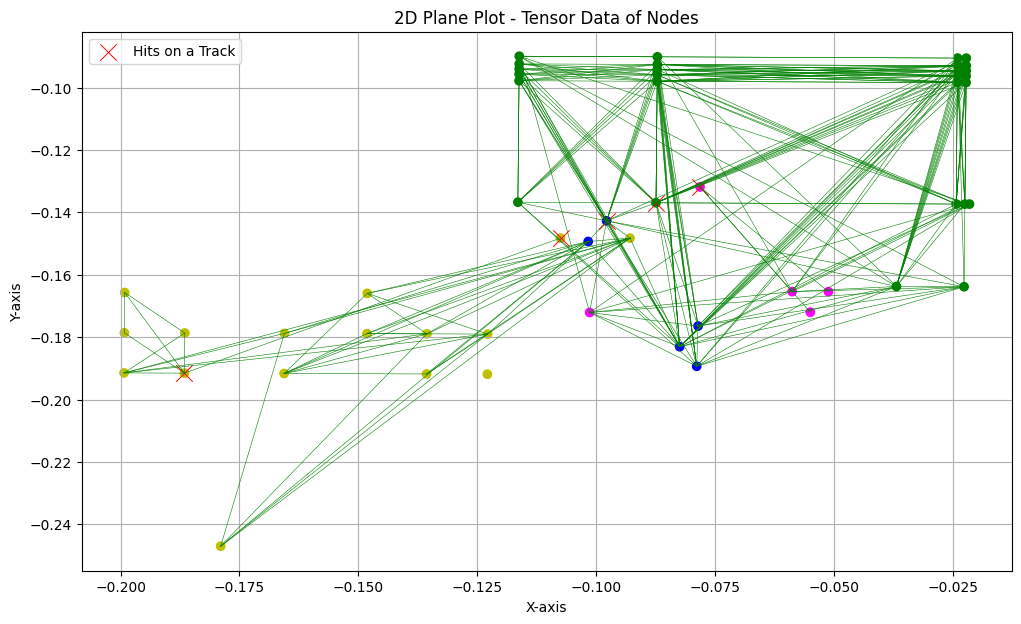

In [ ]:
from matplotlib.colors import ListedColormap

coordinate_data = dataset[selected_index].x_2d
coordinate_data_2 = (dataset[selected_index].x_2d)[(dataset[selected_index].y) == 1]

values = dataset[selected_index].layer

unique_values = values.unique()
num_unique_values = len(unique_values)
color_map = ListedColormap(['magenta', 'g', 'b', 'y'][:num_unique_values])

# Map values to colors
colors = [color_map(value.item()) for value in values]


data_edge_index_can = dataset[selected_index].edge_index_can
mask = pos_pred[:, 0]

predicted_edges = data_edge_index_can[:, mask]

x = coordinate_data[:, 0]
y = coordinate_data[:, 1]

p = coordinate_data_2[:, 0]
q = coordinate_data_2[:, 1]


fig = plt.figure(figsize=(12, 7))

# Create a scatter plot
plt.scatter(x, y, c=colors, marker='o')
plt.scatter(p, q, label="Hits on a Track", color='r', marker='x', s=140, linewidth=0.7)
#plt.plot(predicted_edges_x, predicted_edges_y, linestyle='-', color='g')

for i in range(predicted_edges.shape[1]):
    idx1 = predicted_edges[0, i] - 1  # Adjust index to zero-based indexing
    idx2 = predicted_edges[1, i] - 1  # Adjust index to zero-based indexing
    plt.plot([x[idx1], x[idx2]], [y[idx1], y[idx2]], color='g', linewidth=0.4)


# Add labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("2D Plane Plot - Tensor Data of Nodes")

# Show the plot
plt.grid(True)
plt.legend()
plt.show()